<a href="https://colab.research.google.com/github/dharun-1303/CodSoft-Genere-/blob/main/CodSoft_Task_1_Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DATASET**

In [ ]:

#import all the nessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

In [ ]:
genre_list = [ 'action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western' ]



fallback_genre = 'Unknown'



#reading the trained data

df = pd.read_csv('/content/train_data.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


df.head()

,1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents,10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious,he refuses to speak to anyone except straight-talking Rose,the lady in pink he meets on the hospital stairs. As Christmas approaches,Rose uses her fantastical experiences as a professional wrestler,her imagination,wit and charm to allow Oscar to live life and love to the full,in the company of his friends Pop Corn,Einstein,Bacon and childhood sweetheart Peggy Blue.
0,2 ::: Cupid (1997) ::: thriller ::: A brother ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3 ::: Young,Wild and Wonderful (1980) ::: adult ::: As th...,little does the tour guide suspect that the s...,during the lecture films,the coeds drift into dreams of the most eroti...,they release the emotion of the fantasies in ...,but as the bus departs,everyone admits it was quite an education.,NaN,NaN
2,4 ::: The Secret Sin (1915) ::: drama ::: To h...,Edith and her twin sister Grace work as seams...,Grace falls prey to the temptations of Chinat...,a condition worsened by a misguided physician...,the family enjoys a new prosperity and the si...,a fellow oil prospector. To Grace's shock,Jack falls in love with Edith and in her jeal...,Grace tells Jack that Edith,not she,has a drug problem. Hinting that her sister w...
3,5 ::: The Unrecovered (2007) ::: drama ::: The...,but also to the state of the nation at large....,The Unrecovered examines the effect of terror...,the way a state of heightened anxiety and/or ...,empathy,and paranoia relate to one another in the wak...,NaN,NaN,NaN,NaN
4,6 ::: Quality Control (2011) ::: documentary :...,over a two day period,in a dry cleaners facility in Pritchard,Alabama,near Mobile,Quality Control exhibits the acts as well the...,"in Everson's words ""the fine folks of Alabama...",in form and rhythm,to certain scenarios in Everson's award-winni...,including Erie (IFFR 2010) and in thematic co...


In [ ]:
#importing part
#train #Tesing Part
tr_data=pd.read_csv("/content/train_data.csv",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])
display(tr_data.head())
print(tr_data.shape)

#test
tst_data=pd.read_csv("/content/test_data.csv",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])
display(tst_data.head())
print(tst_data.shape)

#test sol
tst_data_sol=pd.read_csv("/content/test_data_solution.csv",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])
display(tst_data_sol.head())
print(tst_data_sol.shape)

<ipython-input-24-998c6995fe15>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tr_data=pd.read_csv("/content/train_data.csv",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


<ipython-input-24-998c6995fe15>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tst_data=pd.read_csv("/content/test_data.csv",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])


,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(54200, 4)


<ipython-input-24-998c6995fe15>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tst_data_sol=pd.read_csv("/content/test_data_solution.csv",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])


,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(36929, 4)


**TRAINING THE DATA SET**

In [38]:
#training the data with tqdm
try:
    with tqdm(total=50, desc="Loading Train Data") as pbar:
        train_data = pd.read_csv('/content/train_data.csv', sep=':::', header=None, names=['SerialNumber', 'MOVIE_NAME', 'GENRE', 'MOVIE_PLOT'], engine='python')
        pbar.update(50)
except Exception as e:
    print(f"Error loading train_data: {e}")
    raise

Loading Train Data: 100%|██████████| 50/50 [00:00<00:00, 136.04it/s]


In [40]:
X_train = train_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())
genre_labels = [genre.split(', ') for genre in train_data['GENRE']]
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(genre_labels)


In [41]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

**VECTORIZING THE DATA**

In [42]:

with tqdm(total=100, desc="Vectorizing Training Data") as pbar:
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    pbar.update(100)

Vectorizing Training Data: 100%|██████████| 100/100 [00:07<00:00, 12.80it/s]


**TRANING THE MODEL**

In [43]:
with tqdm(total=100, desc="Training Model") as pbar: # training the model with navies bayes classifier
    naive_bayes = MultinomialNB()
    multi_output_classifier = MultiOutputClassifier(naive_bayes)
    multi_output_classifier.fit(X_train_tfidf, y_train)
    pbar.update(100)

Training Model: 100%|██████████| 100/100 [00:01<00:00, 50.22it/s]


**LOADING THE TRANING MODEL**





In [ ]:
#training the data with tqdm
try:
    with tqdm(total=50, desc="Loading Train Data") as pbar:
        train_data = pd.read_csv('/content/train_data.csv', sep=':::', header=None, names=['SerialNumber', 'MOVIE_NAME', 'GENRE', 'MOVIE_PLOT'], engine='python')
        pbar.update(50)
except Exception as e:
    print(f"Error loading train_data: {e}")
    raise


Loading Train Data: 100%|██████████| 50/50 [00:00<00:00, 106.40it/s]


**LOADING TEST DATA**



In [45]:
try:
    with tqdm(total=100, desc="Loading Test Data") as pbar:
        test_data = pd.read_csv('/content/test_data.csv', sep=':::', header=None, names=['SerialNumber', 'MOVIE_NAME', 'MOVIE_PLOT'], engine='python')
        pbar.update(100)
except Exception as e:
    print(f"Error loading test_data: {e}")
    raise

Loading Test Data: 100%|██████████| 100/100 [00:01<00:00, 71.10it/s]


In [46]:
X_test = test_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())


In [47]:
with tqdm(total=100, desc="Vectorizing Test Data") as pbar:
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    pbar.update(100)



Vectorizing Test Data: 100%|██████████| 100/100 [00:06<00:00, 15.14it/s]


**PREDICTING THE TEST MODEL**










In [48]:
with tqdm(total=100, desc="Predicting on Test Data") as pbar:
    y_pred = multi_output_classifier.predict(X_test_tfidf)
    pbar.update(100)



Predicting on Test Data: 100%|██████████| 100/100 [00:01<00:00, 85.27it/s]


In [52]:
test_movie_names = test_data['MOVIE_NAME']
predicted_genres = mlb.inverse_transform(y_pred)
test_results = pd.DataFrame({'MOVIE_NAME': test_movie_names, 'PREDICTED_GENRES': predicted_genres})


RESULT OF TESTING MODEL

In [53]:
test_results['PREDICTED_GENRES'] = test_results['PREDICTED_GENRES'].apply(lambda genres: [fallback_genre] if len(genres) == 0 else genres)


In [54]:
with open("model_classification.txt", "w", encoding="utf-8") as output_file:
    for _, row in test_results.iterrows():
        movie_name = row['MOVIE_NAME']
        genre_str = ', '.join(row['PREDICTED_GENRES'])
        output_file.write(f"{movie_name} ::: {genre_str}\n")

In [55]:
y_train_pred = multi_output_classifier.predict(X_train_tfidf)

In [56]:
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='micro')
recall = recall_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

In [57]:
with open("model_classification.txt", "a", encoding="utf-8") as output_file:
    output_file.write("\n\nModel Evaluation Metrics:\n")
    output_file.write(f"Accuracy: {accuracy * 100:.2f}%\n")
    output_file.write(f"Precision: {precision:.2f}\n")
    output_file.write(f"Recall: {recall:.2f}\n")
    output_file.write(f"F1-score: {f1:.2f}\n")

**SELECTING THE TOP 30 GENRE MODELS**

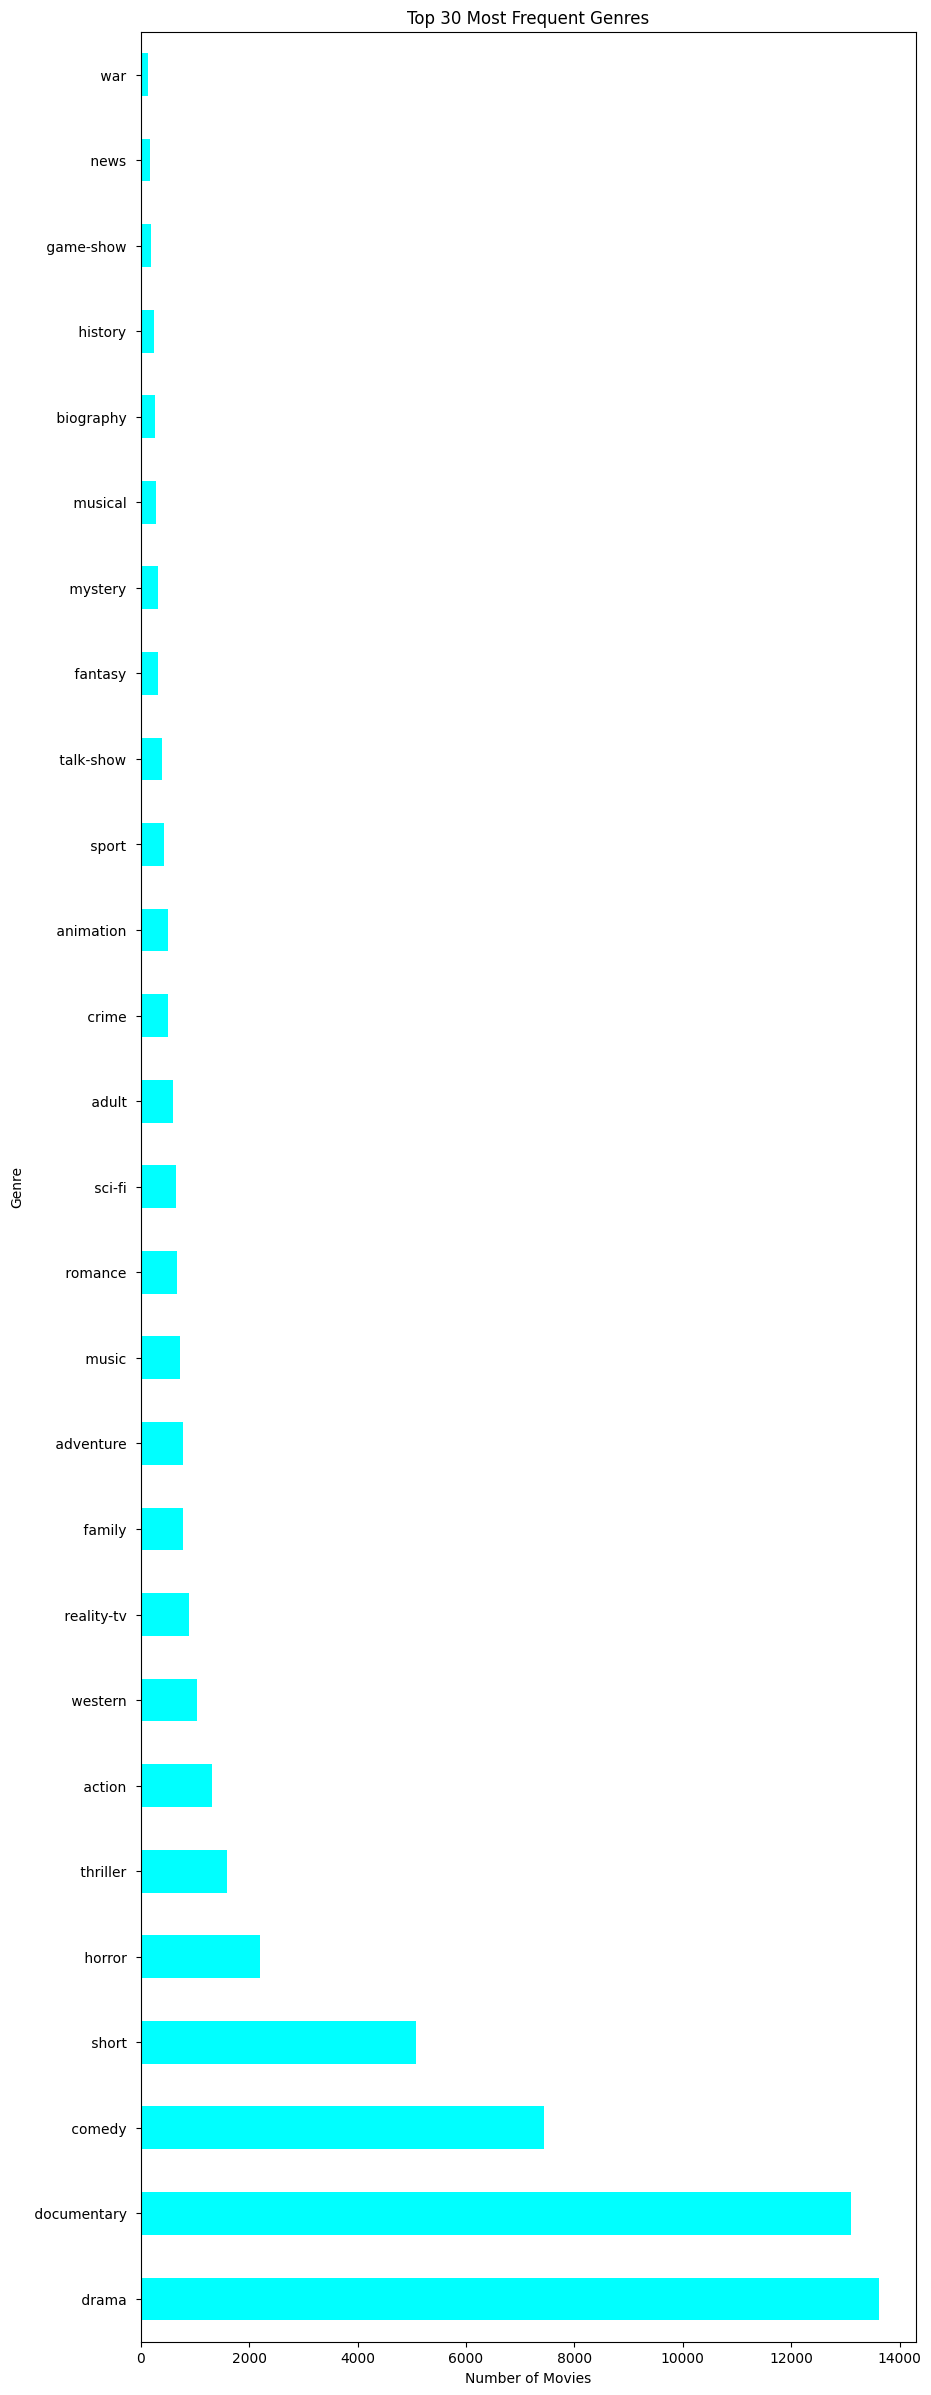

In [51]:
#top  30 movie  genre
top_genre = tr_data['Genre'].value_counts().head(30)

plt.figure(figsize=(10,30))
top_genre.plot(kind='barh', color='cyan')
plt.title('Top 30 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca()
plt.show()

#top genre is drama.

**TOTAL NUMBER OF  MOVIE GENRE**

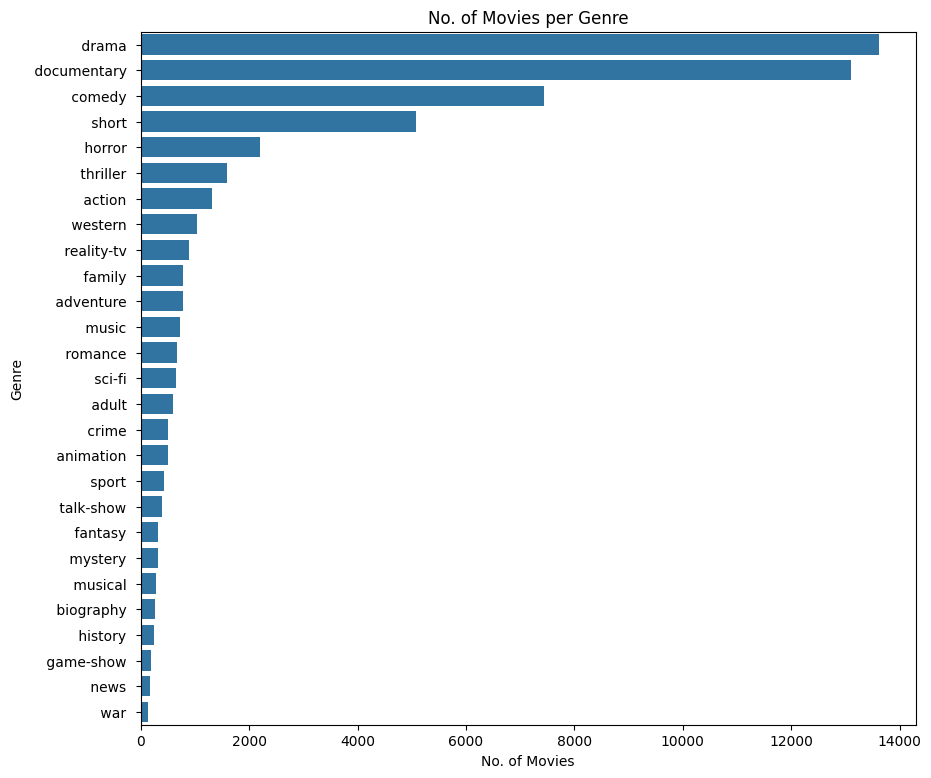

In [ ]:
plt.figure(figsize=(10,9))
sns.countplot(y=tr_data['Genre'], order = tr_data['Genre'].value_counts().index)
plt.title('No. of Movies per Genre')
plt.xlabel('No. of Movies')
plt.ylabel('Genre')
plt.show()